In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Datasets/winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.shape

(1599, 12)

In [5]:
df.isnull().any().sum()

0

In [6]:
df.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

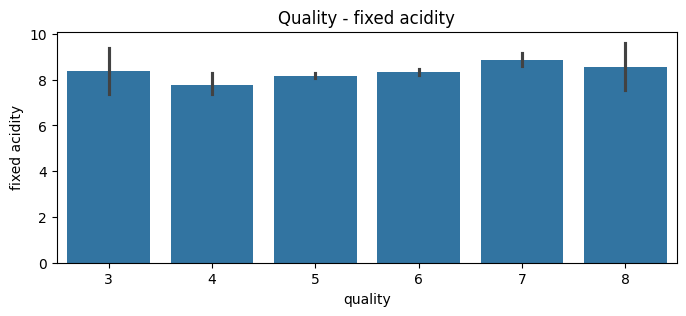

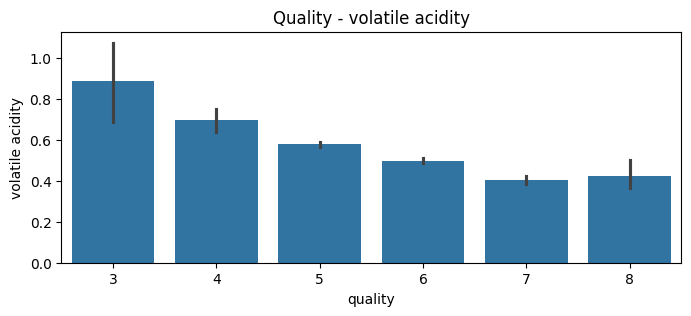

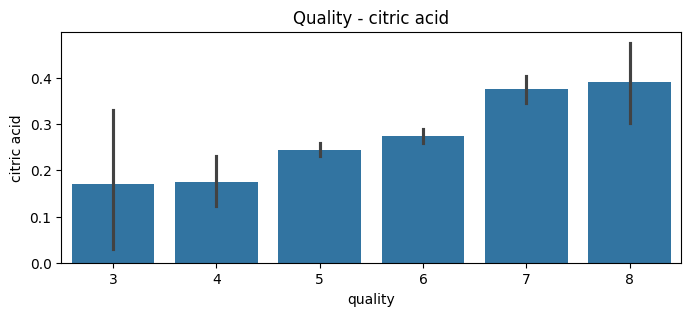

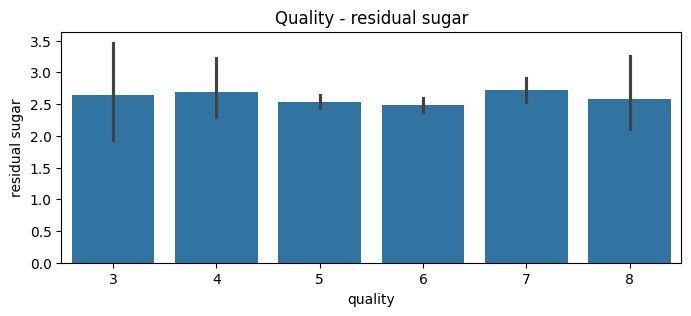

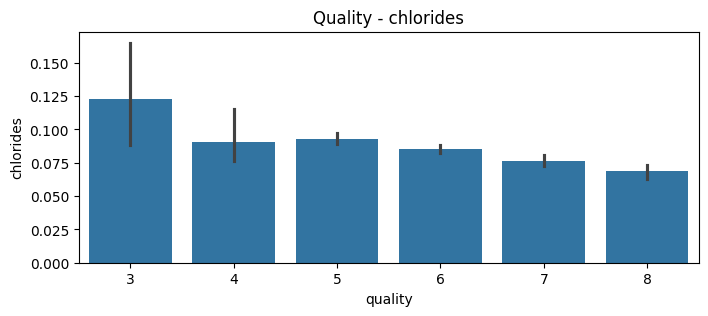

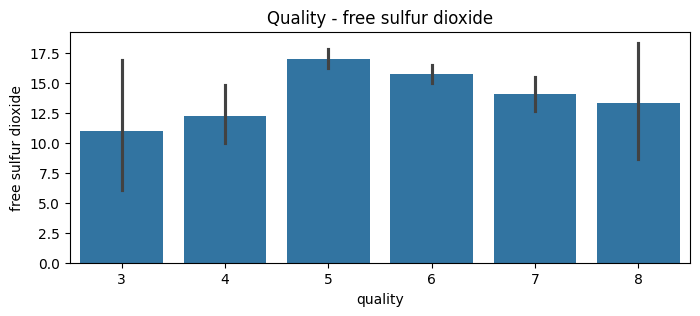

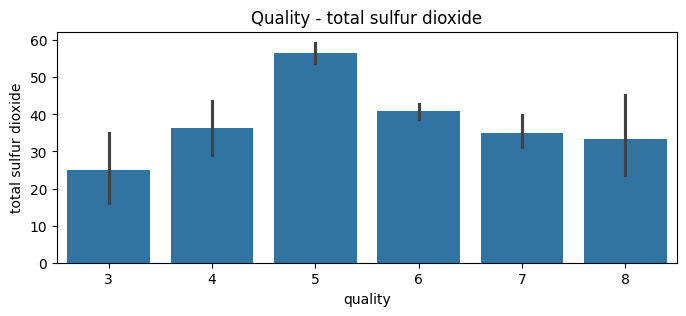

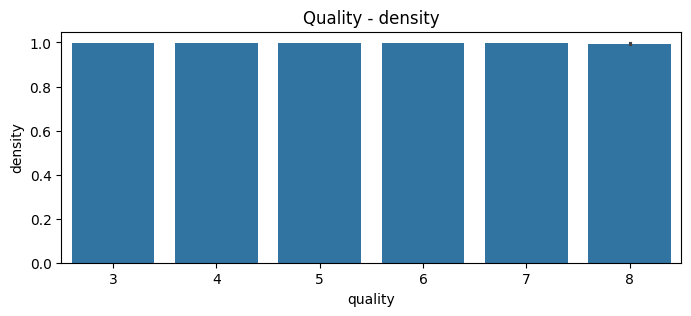

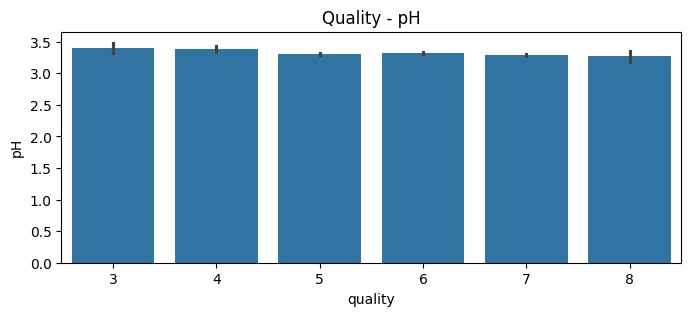

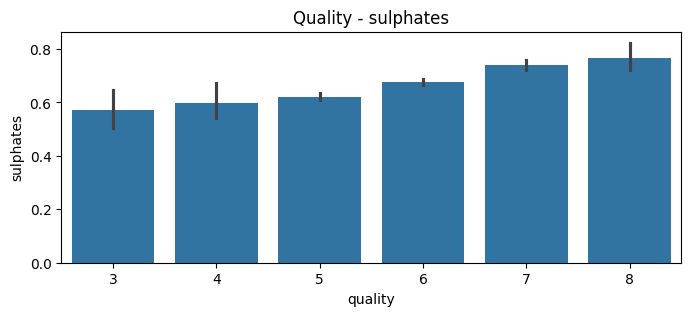

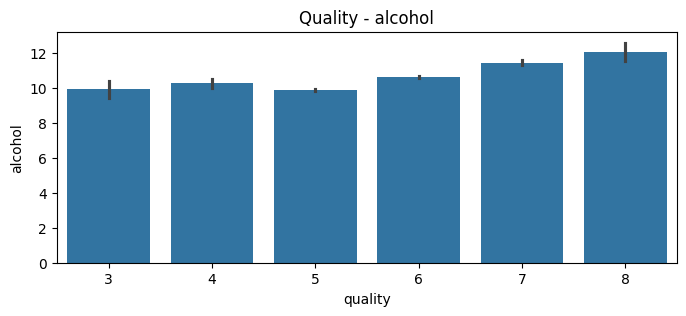

In [7]:
for i in df.columns[:-1]:
    plt.figure(figsize=(8, 3))
    sns.barplot(df, x='quality', y=i)
    plt.title('Quality - '+ i)
    plt.show()

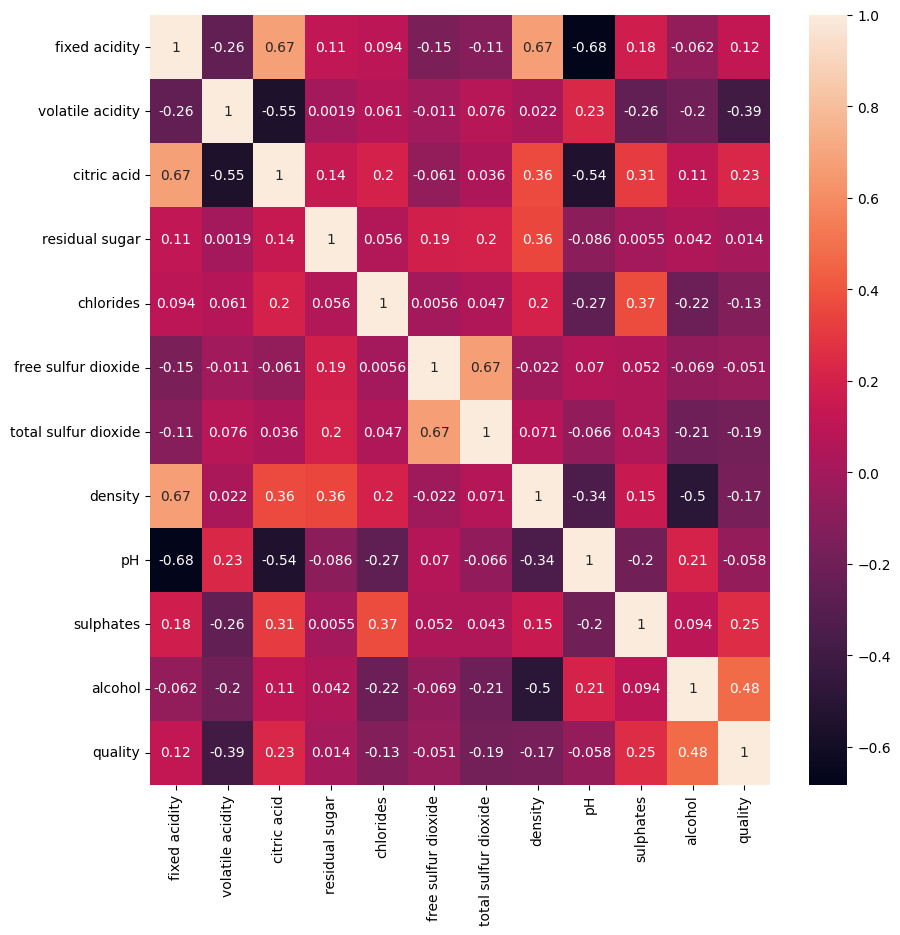

In [113]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

In [14]:
df1 = df.drop(['residual sugar', 'free sulfur dioxide', 'pH'], axis=1)
df1.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


In [27]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [40]:
cuts = (2, 6, 8)
title = ['Eww', 'Wahh']

df1['quality'] = pd.cut(df['quality'], bins=cuts, labels=title)

In [41]:
df1.quality.unique()

['Eww', 'Wahh']
Categories (2, object): ['Eww' < 'Wahh']

<Axes: xlabel='count', ylabel='quality'>

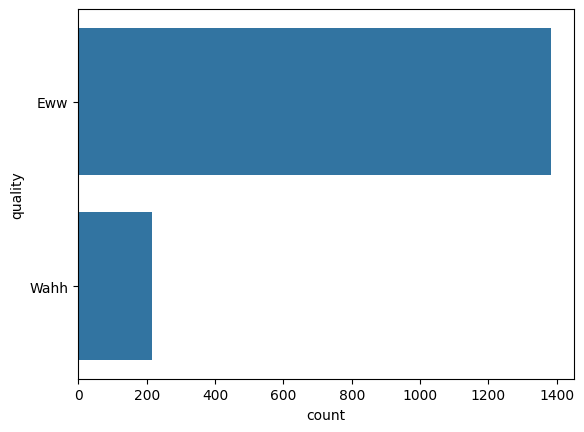

In [47]:
sns.countplot(df1['quality'])

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
new_quality = LabelEncoder()

In [50]:
df1['quality'] = new_quality.fit_transform(df1['quality'])

In [52]:
df1.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,0
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,0
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,0
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0


In [51]:
df1.quality.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [69]:
X = df1.drop('quality', axis=1)
y = df1['quality']

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

In [74]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
from sklearn.svm import SVC

In [76]:
model = SVC()

In [77]:
model.fit(X_train, y_train)

SVC()

In [78]:
y_pred = model.predict(X_test)

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [108]:
cvs = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)

In [109]:
cvs.mean()

0.8897699311023622

In [115]:
cfm = confusion_matrix(y_test, y_pred)

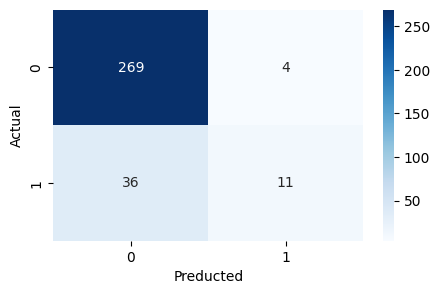

In [124]:
plt.figure(figsize=(5, 3))
sns.heatmap(data=cfm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Preducted')
plt.ylabel('Actual')
plt.show()

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       273
           1       0.73      0.23      0.35        47

    accuracy                           0.88       320
   macro avg       0.81      0.61      0.64       320
weighted avg       0.86      0.88      0.85       320



In [127]:
model2 = SVC()

In [137]:
params = {'C': [0.1, 1, 10],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : [1, 0.01, 0.001]}

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
cv_model = GridSearchCV(estimator=model2, param_grid=params, cv=10)

In [140]:
cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [141]:
cv_model.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [142]:
tuned_model = SVC(C=1, gamma=1, kernel='rbf')

In [143]:
tuned_model.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [144]:
y_pred = tuned_model.predict(X_test)

In [145]:
tcv = cross_val_score(estimator=tuned_model, X=X_train, y=y_train, cv=10)
tcv.mean()

0.8975885826771653

In [147]:
tcfm = confusion_matrix(y_test, y_pred)

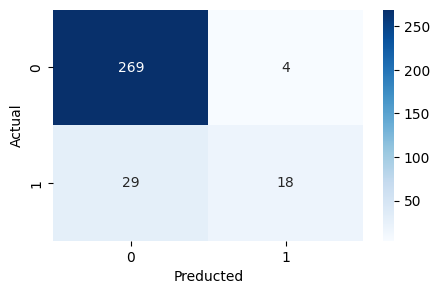

In [148]:
plt.figure(figsize=(5, 3))
sns.heatmap(data=tcfm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Preducted')
plt.ylabel('Actual')
plt.show()

In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.82      0.38      0.52        47

    accuracy                           0.90       320
   macro avg       0.86      0.68      0.73       320
weighted avg       0.89      0.90      0.88       320

